In [1]:
import attack
from importlib import reload
reload(attack)

<module 'attack' from '/home/jovyan/work/workshop/src/attack.py'>

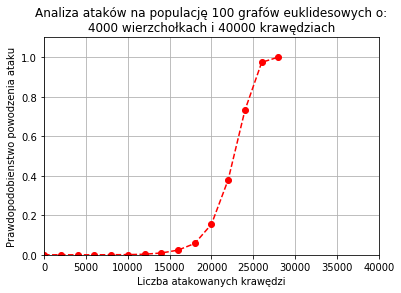

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
x = [1, 2001, 4001, 6001, 8001, 10001, 12001, 14001, 16001, 18001, 20001, 22001,
24001, 26001, 28001]
y = [0.0, 0.0, 0.0, 0.0, 0.00039603960396039607, 0.0007920792079207921,
0.00295093986840146, 0.00908384187315775, 0.023589106234184753,
0.05723000984667387, 0.15454993248243176, 0.3803906035006877, 
0.7317659986473679, 0.9737099999999999, 1.0]
plt.plot(x, y, '--ro')
axes = plt.gca()
axes.set_xlim([0, 40000])
axes.set_ylim([0, 1.1])
plt.grid(True)
gtype = {
    "random": "losowych ER",
    "euclidean": "euklidesowych"
}
plt.title(f"Analiza ataków na populację 100 grafów "
          f"euklidesowych o:\n"
          f"4000 wierzchołkach i 40000 krawędziach")
plt.xlabel("Liczba atakowanych krawędzi")
plt.ylabel("Prawdopodobienstwo powodzenia ataku")
# for x, y in zip(x, y):
#     ax.annotate(f"({x}, {y:.2f})", xy=(x, y), textcoords='data', fontsize=3)
plt.savefig(f"plots/N4000_M40000_euclidean_mock.png", dpi=300)

In [390]:
import numpy as np
%time population = attack.generate_graph_population(10, "random", 4, 6)
%time results = [attack.analyse_attack(g, 1000, 3) for g in population]
%time attack.AnalysisResult(*tuple(np.mean(results, axis=0)))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 360 µs
CPU times: user 150 ms, sys: 20 ms, total: 170 ms
Wall time: 172 ms
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 127 µs


AnalysisResult(tries=1000.0, successes=204.9, failures=795.1)

In [5]:
import igraph
import random
g = igraph.Graph.Erdos_Renyi(1000000, m=100000, directed=False)
%time attack.perform_attack(g, 200)
%time attack.perform_attack_old(g, 200)

CPU times: user 60 ms, sys: 20 ms, total: 80 ms
Wall time: 74.5 ms
CPU times: user 7.18 s, sys: 1.59 s, total: 8.77 s
Wall time: 8.8 s


In [43]:
attack.generate_graph_population(100, "random", 4000, 8000)

In [46]:
%time attack.process()

### Analysing graph population defined by: PopulationParameters(size=100, graph_type='random', n=4000, m=8000)
## Analysis results:
# Params: AttackParameters(tries=10000, multiplicity=1, failure_threshold=1000.0)
# Mean: AttackResult(tries=1038.67, successes=38.67, failures=1000.0, probability=0.03719601264444075)
## Analysis results:
# Params: AttackParameters(tries=10000, multiplicity=2, failure_threshold=1000.0)
# Mean: AttackResult(tries=1081.65, successes=81.65, failures=1000.0, probability=0.07540847017926817)
## Analysis results:
# Params: AttackParameters(tries=10000, multiplicity=4, failure_threshold=1000.0)
# Mean: AttackResult(tries=1172.54, successes=172.54, failures=1000.0, probability=0.1470026213148808)
## Analysis results:
# Params: AttackParameters(tries=10000, multiplicity=8, failure_threshold=1000.0)
# Mean: AttackResult(tries=1371.09, successes=371.09, failures=1000.0, probability=0.27026018669174584)
## Analysis results:
# Params: AttackParameters(tries=10000, mul

KeyboardInterrupt: 